<a href="https://colab.research.google.com/github/dnhshl/cc-ai/blob/main/segmentation_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from fastai.vision.all import *

In [4]:
path = untar_data(URLs.CAMVID_TINY)
path.ls()

(#3) [Path('/root/.fastai/data/camvid_tiny/labels'),Path('/root/.fastai/data/camvid_tiny/codes.txt'),Path('/root/.fastai/data/camvid_tiny/images')]

In [5]:
codes = np.loadtxt(path/'codes.txt', dtype=str)
codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car',
       'CartLuggagePram', 'Child', 'Column_Pole', 'Fence', 'LaneMkgsDriv',
       'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving',
       'ParkingBlock', 'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk',
       'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel',
       'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

In [6]:
fnames = get_image_files(path/"images")
fnames[0]

Path('/root/.fastai/data/camvid_tiny/images/Seq05VD_f01260.png')

In [7]:
(path/"labels").ls()[0]

Path('/root/.fastai/data/camvid_tiny/labels/Seq05VD_f01080_P.png')

In [8]:
def label_func(fn): return path/"labels"/f"{fn.stem}_P{fn.suffix}"

In [9]:
camvid = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items = get_image_files,
                   get_y = label_func,
                   splitter=RandomSplitter(),
                   batch_tfms=aug_transforms(size=(120,160)))

dls = camvid.dataloaders(path/"images", path=path, bs=8)

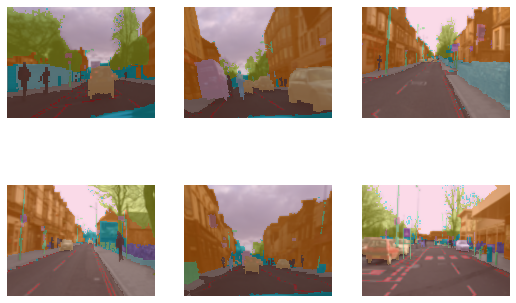

In [10]:
dls.show_batch(max_n=6)

In [11]:
learn = unet_learner(dls, resnet34)
learn.fine_tune(6)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.213847,2.670814,00:05


epoch,train_loss,valid_loss,time
0,1.939815,1.603004,00:02
1,1.722651,1.374679,00:02
2,1.546757,1.164684,00:02
3,1.441509,1.127027,00:02
4,1.342748,1.028648,00:02
5,1.262741,0.995945,00:02


In [12]:
learn.fine_tune(6)


epoch,train_loss,valid_loss,time
0,1.196496,1.436063,00:02


epoch,train_loss,valid_loss,time
0,1.076538,0.919834,00:02
1,0.956328,1.059797,00:02
2,0.918592,0.819041,00:02
3,0.877160,0.752036,00:02
4,0.826093,0.746100,00:02
5,0.785875,0.743653,00:02


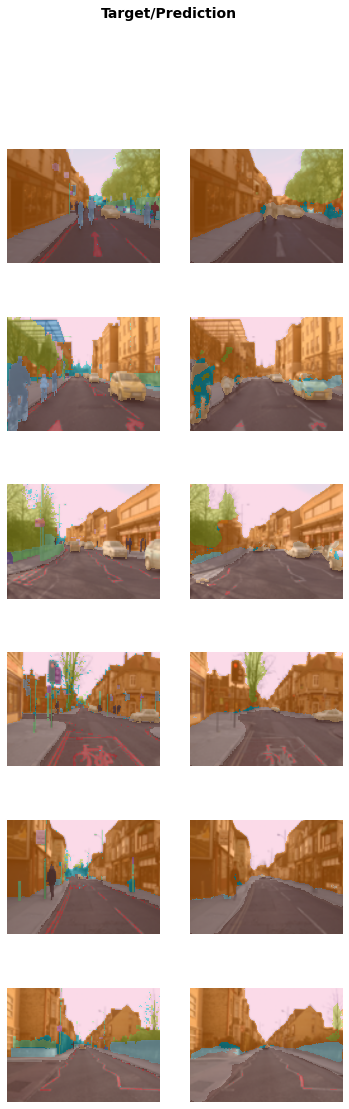

In [14]:
learn.show_results(max_n=6)

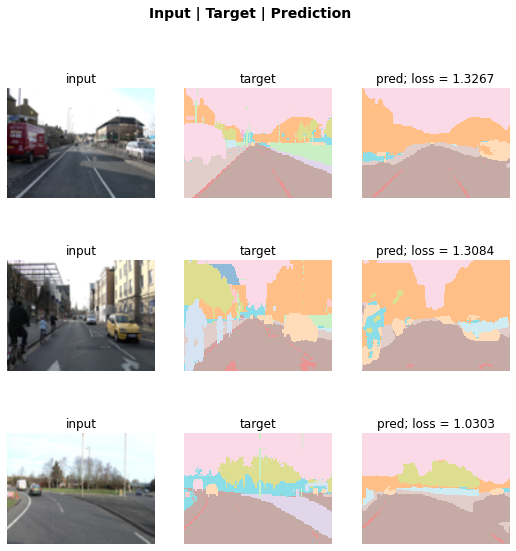

In [15]:
interp = SegmentationInterpretation.from_learner(learn)
interp.plot_top_losses(k=3)

In [38]:
prediction = learn.predict('test2.png')

In [31]:
?display

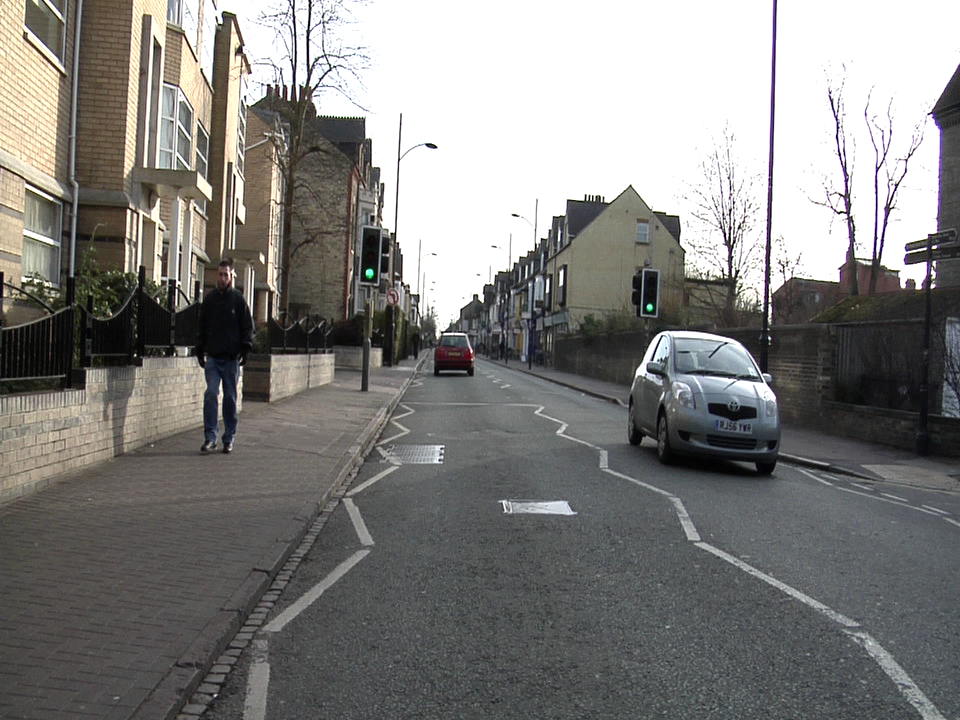

In [39]:
display(Image.open('test2.png'))

<AxesSubplot:>

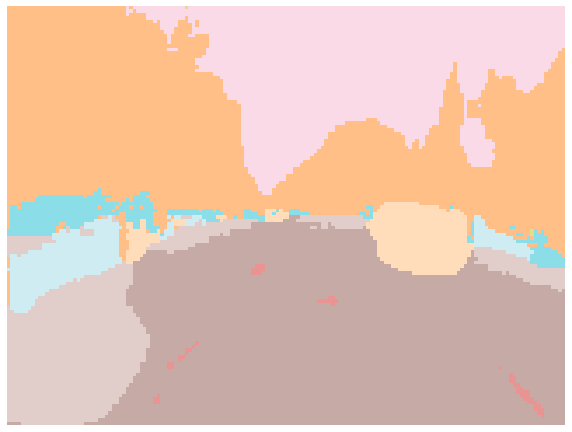

In [40]:
 #prediction[0].show(figsize=(8,8))
 prediction[0].show(figsize=(10,10))

In [20]:
??learn.predict